## Gathering Data

In [1]:
import pandas as pd
import tweepy
import json 
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

1. On hand file for WeRateDogs Twitter archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. File for tweet image predictions, i.e., what breed of dog (or other object, animal, etc.)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
content =pd.read_csv(url)
content.to_csv('image-predictions.tsv', index= False)
image_predictions = pd.read_csv('image-predictions.tsv', sep = "\t")

3.  Information via Twitter API for each tweet'

In [4]:
#do just once to generate tweet_json.txt file
"""
#authentification parametres for twetter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")
    
#storing each tweet's entire set of JSON data in a file called tweet_json.txt file
not_exisitng_tweedIDs = []
with open('tweet_json.txt', 'w') as file:
    for ID in twitter_archive.tweet_id:
        try:
            json.dump(api.get_status(ID)._json, file)
            file.write('\n')
        except:
            not_exisitng_tweedIDs.append(ID)
            
"""       

'\n#authentification parametres for twetter API\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_token_secret)\napi = tweepy.API(auth)\n\n# test authentication\ntry:\n    api.verify_credentials()\n    print("Authentication OK")\nexcept:\n    print("Error during authentication")\n    \n#storing each tweet\'s entire set of JSON data in a file called tweet_json.txt file\nnot_exisitng_tweedIDs = []\nwith open(\'tweet_json.txt\', \'w\') as file:\n    for ID in twitter_archive.tweet_id:\n        try:\n            json.dump(api.get_status(ID)._json, file)\n            file.write(\'\n\')\n        except:\n            not_exisitng_tweedIDs.append(ID)\n            \n'

In [5]:
#storing tweet ID, retweet count, and favorite count ("likes") in pandas DataFrame tweet_info
tweet_info = pd.DataFrame(columns=['tweet_id', 'retweet_counts', 'like_counts'])
tweet_id = []
retweet_counts = []
like_counts = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        l = json.loads(line)
        tweet_id.append(l['id_str'])
        retweet_counts.append(l['retweet_count'])
        like_counts.append(l['favorite_count'])

tweet_info.tweet_id = tweet_id
tweet_info.retweet_counts = retweet_counts
tweet_info.like_counts = like_counts

In [6]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 3 columns):
tweet_id          899 non-null object
retweet_counts    899 non-null int64
like_counts       899 non-null int64
dtypes: int64(2), object(1)
memory usage: 21.1+ KB


## Assessing Data

#### 1. assesing dataframe twitter_archive

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#Check datatypes
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#check for duplicated tweet IDs
twitter_archive.tweet_id.duplicated().sum()

0

In [10]:
#check for empty entries
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
#check for ratings with an denominator not 10
(twitter_archive.rating_denominator != 10).sum()

23

In [12]:
#check for outliers
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

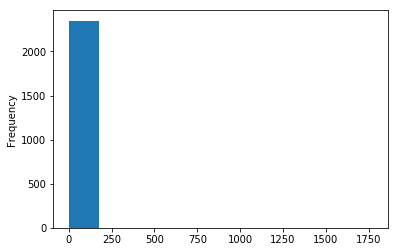

In [13]:
twitter_archive.rating_numerator.plot(kind = "hist");

Observation: The rating has a range from 0 to 1776. That is huge but in the context of WeRateDogs allowed and therefore no quality issue.

In [14]:
#check for the entries in the columns for the dog stages (doggo, floofer, pupper, puppo)
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [15]:
twitter_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [16]:
twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [17]:
twitter_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [18]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Bailey        7
Buddy         7
Toby          7
an            7
Bella         6
Jack          6
Rusty         6
Milo          6
Leo           6
Stanley       6
Dave          6
Oscar         6
Koda          6
Jax           6
Scout         6
Sunny         5
           ... 
Beya          1
Mitch         1
Gin           1
Arlen         1
old           1
Lugan         1
Robin         1
Rinna         1
Sweets        1
Rodman        1
Bobble        1
Darrel        1
Kara          1
Sweet         1
Patch         1
Zoe           1
Snoopy        1
Lilah         1
BeBe          1
Tilly         1
Terrenth      1
Tassy         1
Reagan        1
Apollo        1
Brandy        1
Emma          1
Mary          1
Trip          1
Cuddles       1
Sandra        1
Name: name, Length: 957,

#### 2. assesing dataframe image_predictions

In [20]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
# check for datatypes
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#check for confidence between 0 and 1
image_predictions.p1_conf.min(), image_predictions.p1_conf.max()

(0.044333400000000002, 1.0)

In [23]:
#check for confidence between 0 and 1
image_predictions.p2_conf.min(), image_predictions.p2_conf.max()

(1.0112999999999999e-08, 0.48801400000000011)

In [24]:
#check for confidence between 0 and 1
image_predictions.p3_conf.min(), image_predictions.p3_conf.max()

(1.7401699999999998e-10, 0.27341900000000002)

In [25]:
#check for duplicates
image_predictions.tweet_id.duplicated().sum()

0

#### 3. assesing dataframe tweet_info

In [26]:
tweet_info.head()

,tweet_id,retweet_counts,like_counts
0,743609206067040256,1317,4295
1,743595368194129920,6188,17560
2,743545585370791937,892,3389
3,743510151680958465,3539,7617
4,743253157753532416,1158,4058


In [27]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 3 columns):
tweet_id          899 non-null object
retweet_counts    899 non-null int64
like_counts       899 non-null int64
dtypes: int64(2), object(1)
memory usage: 21.1+ KB


In [28]:
#check for duplicates
tweet_info.tweet_id.duplicated().sum()

0

### Qulity Issues 

twitter_archive table
1. The column tweet_id is of datatype integer (int64) and not a string.
2. The column timestamp is not datetime datetype.
- Some tweets are retweets and not the original tweet.
- To ratings are not comparable if the denominators vary.
- Most of the entries in the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are empty.
- The entries in the source column are surrounded by html tags, but only the content between '>' and '<' is relevant.
- The name column contains strings like "a", "the", "an", "my"....

image_predictions
8. The column tweet_id is of datatype integer (int64) and not a string.
- Some of the fist letters in the column predictions are written in capital letters, some not.

### Tidiness Issues

9. In twitter_archive the categories "doggo", "floofer", "pupper" and "puppo" are in 4 seperated columns.
- The tables tweet_info, twitter_archive and image_prediction are in sperate tabels.

## Cleaning Data

It is recommended to start with tiding up the data to make later cleaning easier.

In [29]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

##### Observe: 
9. In twitter_archive the categories "doggo", "floofer", "pupper" and "puppo" are in 4 seperated columns.

##### Define: 
Combine the 4 columns to one with the 4 categories as entries. Combinations of categories are also allowed. Drop the columns "doggo", "floofer", "pupper" and "puppo".

##### Code: 

In [30]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer  + twitter_archive_clean.pupper  + twitter_archive_clean.puppo

In [31]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].str.replace('None','')

In [32]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].astype('category')

In [33]:
twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

##### Test: 

In [34]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [35]:
twitter_archive_clean['dog_stages'].unique().categories

Index(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo', 'doggofloofer',
       'doggopupper'],
      dtype='object')

##### Observe: 
1. In twitter_archive the column tweet_id is of datatype integer (int64) and not a string. Before we can merge the tables, we need to remove the qulity issue that the ID in the twitter_archive table is not a string but a integer. 

##### Define: 
Converte the column tweet_id to string (datatype object).

##### Code: 

In [36]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

##### Test:

In [37]:
twitter_archive_clean.tweet_id.dtype

dtype('O')

##### Observe: 
8. In image_prediction the column tweet_id is of datatype integer (int64) and not a string. As described in the previous observation, this needs to be fixed before a merge is possible.

##### Define: 
Converte the column tweet_id to string (datatype object).

##### Code: 

In [38]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

##### Test:

In [39]:
twitter_archive_clean.tweet_id.dtype

dtype('O')

##### Observe: 
10. The tables tweet_info, twitter_archive and image_prediction are in sperate tabels.

##### Define: 
Combine the tables twitter_archive, tweet_info and image_prediction by the inner merging on the tweed Ids because we are only interested in those tweets which are represented in all tables. 

##### Code: 

In [40]:
tweet_info_clean = tweet_info_clean.rename(columns = {'tweet_ID':'tweet_id'})
tweets_clean = twitter_archive_clean.merge(tweet_info_clean,  left_on='tweet_id', right_on='tweet_id').merge(image_predictions_clean, left_on='tweet_id', right_on='tweet_id')

##### Test:

In [41]:
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'retweet_counts',
       'like_counts', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

##### Observe:
2. The column timestamp is not datetime datetype.

##### Define:
Converte the column timestamp to the datatype datetime.

##### Code:

In [42]:
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)

##### Test:

In [43]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 810
Data columns (total 27 columns):
tweet_id                      811 non-null object
in_reply_to_status_id         15 non-null float64
in_reply_to_user_id           15 non-null float64
timestamp                     811 non-null datetime64[ns]
source                        811 non-null object
text                          811 non-null object
retweeted_status_id           1 non-null float64
retweeted_status_user_id      1 non-null float64
retweeted_status_timestamp    1 non-null object
expanded_urls                 811 non-null object
rating_numerator              811 non-null int64
rating_denominator            811 non-null int64
name                          811 non-null object
dog_stages                    811 non-null category
retweet_counts                811 non-null int64
like_counts                   811 non-null int64
jpg_url                       811 non-null object
img_num                       811 non-null 

##### Observe:
3. Some tweets are retweets and not the original tweet.

##### Define:
Delete all tweets from the tweet table that have entries in the columns in_reply_to_status_id and in_reply_to_user_id and therefore are rewteets. Then drop the colimns in_reply_to_status_id and in_reply_to_user_id.

##### Code:

In [44]:
tweets_clean = tweets_clean[tweets_clean.in_reply_to_status_id.isnull()]
tweets_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

##### Test:

In [45]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stages', 'retweet_counts', 'like_counts', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

##### Observe:
4. To ratings are not comparable if the denominators vary.

##### Define:
Remove all tweets that doesn't have a denominator of 10 for the rating.

##### Code:

In [46]:
tweets_clean = tweets_clean[tweets_clean.rating_denominator == 10]

##### Test:

In [47]:
(tweets_clean.rating_denominator != 10).sum()

0

##### Observe:
5. Most of the entries in the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are empty.

##### Define:
These information are not usable. Drop the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

##### Code:

In [48]:
tweets_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

##### Test:

In [49]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'retweet_counts', 'like_counts', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

##### Observe:
6. The entries in the source column are surrounded by html tags, but only the content between '>' and '<' is relevant.
##### Define:
Remove everything outside '>' and '<' und convert the column source to datatype category.

##### Code:

In [50]:
tweets_clean.source = tweets_clean.source.str.extract('\>(.*)\<')

In [51]:
tweets_clean.source = tweets_clean.source.astype('category')

##### Test:

In [52]:
tweets_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter Web Client
4    Twitter for iPhone
Name: source, dtype: category
Categories (3, object): [TweetDeck, Twitter Web Client, Twitter for iPhone]

##### Observe:
7. The name column contains strings like "a", "the", "an", "my"....

##### Define:
Remove all stings in the column "name" that start with a lower case letter.

##### Code:

In [53]:
tweets_clean.loc[tweets_clean['name'] == tweets_clean['name'].str.lower(), 'name'] = None

##### Test:

In [54]:
tweets_clean.name.value_counts()

None        243
Sadie         6
Lucy          5
Oliver        5
Louis         4
Cooper        4
Bella         3
Lola          3
Chester       3
Charlie       3
Archie        3
Ellie         3
Penny         3
Phil          3
Curtis        2
Winston       2
Gary          2
Jimothy       2
Reese         2
Kilo          2
Lily          2
Smokey        2
Bob           2
Patrick       2
Daisy         2
Kyle          2
Larry         2
Stanley       2
Otis          2
Pippa         2
           ... 
Ralphson      1
Pepper        1
Aqua          1
Sugar         1
Koda          1
Terrenth      1
Juckson       1
Willie        1
Aspen         1
Griswold      1
Lolo          1
Trip          1
Marty         1
Vinscent      1
Harper        1
Nala          1
Grady         1
Humphrey      1
Cilantro      1
Obi           1
Gordon        1
Zara          1
Chuq          1
Millie        1
Wyatt         1
Bowie         1
Mona          1
Reginald      1
Kara          1
Mollie        1
Name: name, Length: 423,

##### Observe:
9. In the tabel image_predictions some of the fist letters in the column predictions are written in capital letters, some not.
##### Define:
Change all entries in column p1, p2,  p3 in the tabel image_predictions to lower case.

##### Code:

In [55]:
tweets_clean.p1 = tweets_clean.p1.str.lower()
tweets_clean.p2 = tweets_clean.p2.str.lower()
tweets_clean.p3 = tweets_clean.p3.str.lower()

In [56]:
tweets_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,weimaraner,american_staffordshire_terrier,great_dane
1,hippopotamus,hog,warthog
2,rapeseed,standard_poodle,great_pyrenees
3,sea_lion,tub,hippopotamus
4,malamute,siberian_husky,eskimo_dog


### Insights
#### Distribution

##### Distribution ratings

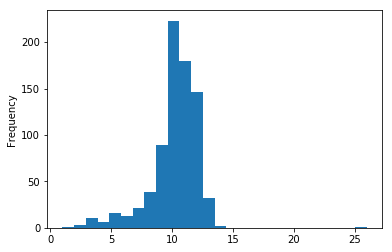

In [57]:
tweets_clean.rating_numerator.plot(kind = 'hist', bins = 26 );

In [58]:
tweets_clean.rating_numerator.describe()

count    783.000000
mean      10.107280
std        2.085447
min        1.000000
25%        9.000000
50%       10.000000
75%       11.000000
max       26.000000
Name: rating_numerator, dtype: float64

Insight: 75 % of the ratings are between 1 and 11 out of 10. There is an oulier with a rating of 26/10.

In [59]:
((tweets_clean.rating_numerator >= 6) & (tweets_clean.rating_numerator <= 13)).mean()

0.94891443167305234

Insight: 95% of the ratings are between 6/10 and 13/10.

##### Distribution likes

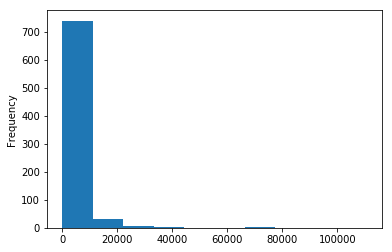

In [60]:
tweets_clean.like_counts.plot(kind = 'hist');

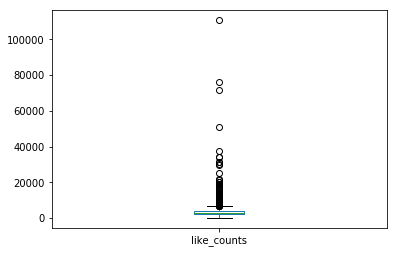

In [61]:
tweets_clean.like_counts.plot(kind = 'box');

In [62]:
tweets_clean.like_counts.describe()

count       783.000000
mean       4193.144317
std        6864.843554
min           0.000000
25%        2000.500000
50%        2712.000000
75%        3889.500000
max      110613.000000
Name: like_counts, dtype: float64

Insight: 50% of the tweets got 2712 or less likes. As visualized in the box plot, there are some tweets with extremly high number of likes.

##### Distribution Retweets

In [63]:
tweets_clean.retweet_counts.describe()

count      783.000000
mean      1533.962963
std       3125.195126
min         81.000000
25%        562.000000
50%        878.000000
75%       1350.500000
max      54858.000000
Name: retweet_counts, dtype: float64

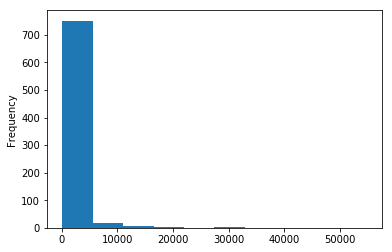

In [64]:
tweets_clean.retweet_counts.plot(kind = 'hist');

In [65]:
(tweets_clean.retweet_counts > 4000).mean()

0.058748403575989781

Insight: The counts of the likes and the retweets seem to be very similar distributed.

#### Correlation

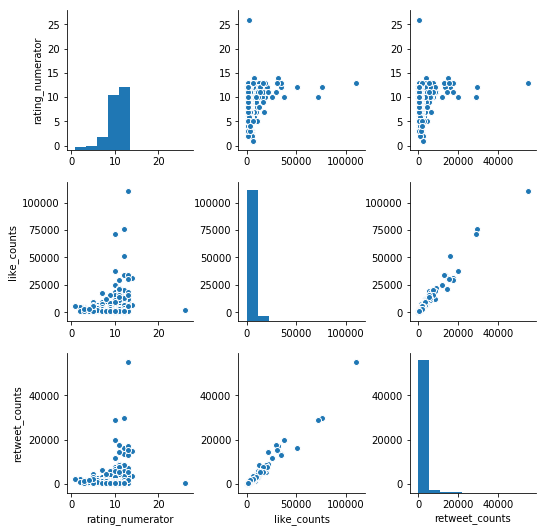

In [66]:
g = sns.pairplot(tweets_clean[['rating_numerator', 'like_counts', 'retweet_counts']])

In [67]:
print('Correlation coefficient for scoring and number of likes:', np.corrcoef(tweets_clean.rating_numerator, tweets_clean.like_counts)[0,1])

Correlation coefficient for scoring and number of likes: 0.138538116949


In [68]:
print('Correlation coefficient for number of likes and number of retweets:', np.corrcoef(tweets_clean.like_counts, tweets_clean.retweet_counts)[0,1])

Correlation coefficient for number of likes and number of retweets: 0.982122776797


In [69]:
print('Correlation coefficient for scoring and number of retweets:', np.corrcoef(tweets_clean.retweet_counts, tweets_clean.rating_numerator)[0,1])

Correlation coefficient for scoring and number of retweets: 0.128631296586


Insight: There is a clear correlation between retweet counts and like counts. This can be seen visually and with the correlation coefficients.

##### Hypothesis Testing "Is the rating score, the number of likes and the number of retweets for puppers higher than for dogs in general dogs?" 

In [70]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [71]:
tweets_clean[tweets_clean.dog_stages.isin(stages)].dog_stages.value_counts()

pupper          136
doggo             7
floofer           3
puppo             2
doggopuppo        0
doggopupper       0
doggofloofer      0
                  0
Name: dog_stages, dtype: int64

If we use only the clearly defind stages and not the combination there is much more data for the category pupper thatn for the others. Therefore it is no representative conclusion possible. A better question to ask would be if the tweets with a pupper have on average a higher rating, retweeting rate or more likes. Therefore I perform a hypothesis testing with a  significance level of 5%. 

In [72]:
sample_data = tweets_clean[['rating_numerator','like_counts','retweet_counts','dog_stages']]

In [73]:
#Obersvations for non-puppers and puppers
#Observation of ratings
rating_observe_all = sample_data[sample_data['dog_stages'] != 'pupper']['rating_numerator'].mean()
rating_observe_pupper = sample_data[sample_data['dog_stages'] == 'pupper']['rating_numerator'].mean()
rating_observe_diff = rating_observe_all - rating_observe_pupper 
#Observation of likes
like_observe_all = sample_data[sample_data['dog_stages'] != 'pupper']['like_counts'].mean()
like_observe_pupper = sample_data[sample_data['dog_stages'] == 'pupper']['like_counts'].mean()
like_observe_diff = like_observe_all - like_observe_pupper 
#Observation of retweets
retweets_observe_all = sample_data[sample_data['dog_stages'] != 'pupper']['retweet_counts'].mean()
retweets_observe_pupper = sample_data[sample_data['dog_stages'] == 'pupper']['retweet_counts'].mean()
retweets_observe_diff = retweets_observe_all - retweets_observe_pupper 

In [74]:
rating_all_means, rating_pupper_means, rating_diffs = [], [], []
like_all_means, like_pupper_means, like_diffs = [], [], []
retweets_all_means, retweets_pupper_means, retweets_diffs = [], [], []

for _ in range(10000):
    bootsamp = sample_data.sample(len(sample_data), replace = True)
    #Bootstrap for rating
    rating_all_mean = bootsamp[bootsamp['dog_stages'] != 'pupper']['rating_numerator'].mean()
    rating_pupper_mean = bootsamp[bootsamp['dog_stages'] == 'pupper']['rating_numerator'].mean()
    rating_all_means.append(rating_all_mean)
    rating_pupper_means.append(rating_pupper_mean)
    rating_diffs.append(rating_all_mean - rating_pupper_mean)  
    #Bootstrap for likes
    like_all_mean = bootsamp[bootsamp['dog_stages'] != 'pupper']['like_counts'].mean()
    like_pupper_mean = bootsamp[bootsamp['dog_stages'] == 'pupper']['like_counts'].mean()
    like_all_means.append(like_all_mean)
    like_pupper_means.append(like_pupper_mean)
    like_diffs.append(like_all_mean - like_pupper_mean)
    #Bootstrap for retweets
    retweets_all_mean = bootsamp[bootsamp['dog_stages'] != 'pupper']['retweet_counts'].mean()
    retweets_pupper_mean = bootsamp[bootsamp['dog_stages'] == 'pupper']['retweet_counts'].mean()
    retweets_all_means.append(retweets_all_mean)
    retweets_pupper_means.append(retweets_pupper_mean)
    retweets_diffs.append(retweets_all_mean - retweets_pupper_mean)
    

##### Rating
$$H_0: \mu_{all} - \mu_{pupper} >= 0$$


$$H_1: \mu_{all} - \mu_{pupper} < 0$$

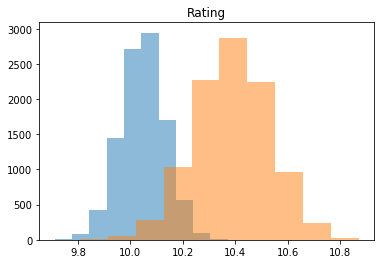

In [75]:
#Ratings
plt.hist(rating_all_means, alpha = 0.5);
plt.hist(rating_pupper_means, alpha = 0.5);
plt.title('Rating');

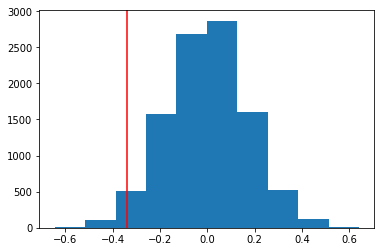

In [76]:
null_vals = np.random.normal(0, np.std(rating_diffs), 10000)
plt.hist(null_vals);
plt.axvline(rating_observe_diff, color = 'red');

In [77]:
(null_vals < rating_observe_diff).mean()

0.020899999999999998

With a significance level of 5% and an observed p-value of larger than 2.1%, I can reject the H_0 hypthesis. Therefore, I assume the difference in the observed ratings for the puppers and all dogs is significant. I assume puppers get on average an higher rating than other dogs.

##### Likes
$$H_0: \mu_{all} - \mu_{pupper} >= 0$$


$$H_1: \mu_{all} - \mu_{pupper} < 0$$

Text(0.5,1,'Likes')

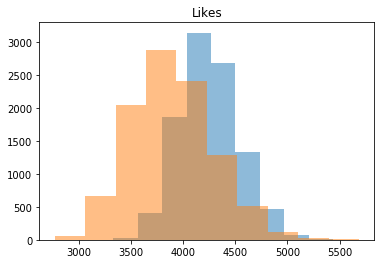

In [78]:
#Likes
plt.hist(like_all_means, alpha = 0.5);
plt.hist(like_pupper_means, alpha = 0.5);
plt.title('Likes')

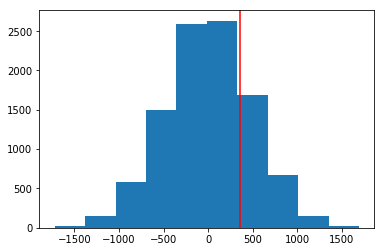

In [79]:
null_vals = np.random.normal(0, np.std(like_diffs), 10000)
plt.hist(null_vals);
plt.axvline(like_observe_diff, color = 'red')

In [80]:
(null_vals < like_observe_diff).mean()

0.76580000000000004

With a p-value of 76.6% we clearly accept the H0 Hypothesis. Therefore, I assume that the number of likes for the puppers are on average not higher than the number of likes for other dogs.

##### Retweets
$$H_0: \mu_{all} - \mu_{pupper} >= 0$$


$$H_1: \mu_{all} - \mu_{pupper} < 0$$

Text(0.5,1,'Retweets')

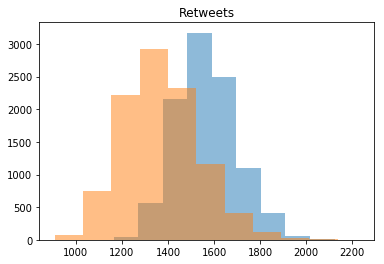

In [81]:
#Retweets
plt.hist(retweets_all_means, alpha = 0.5);
plt.hist(retweets_pupper_means, alpha = 0.5);
plt.title('Retweets')

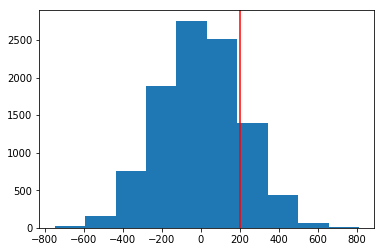

In [82]:
null_vals = np.random.normal(0, np.std(retweets_diffs), 10000)
plt.hist(null_vals);
plt.axvline(retweets_observe_diff, color = 'red')

In [83]:
(null_vals < retweets_observe_diff).mean()

0.82430000000000003

With a p-value of 82.4% we clearly accept the H0 Hypothesis. Therefore, I assume that the number of retweets of tweets with puppers are on average not higher than the number retweets of tweets with other dogs.

#### Which breads get the highest score, the most likes or retweets?

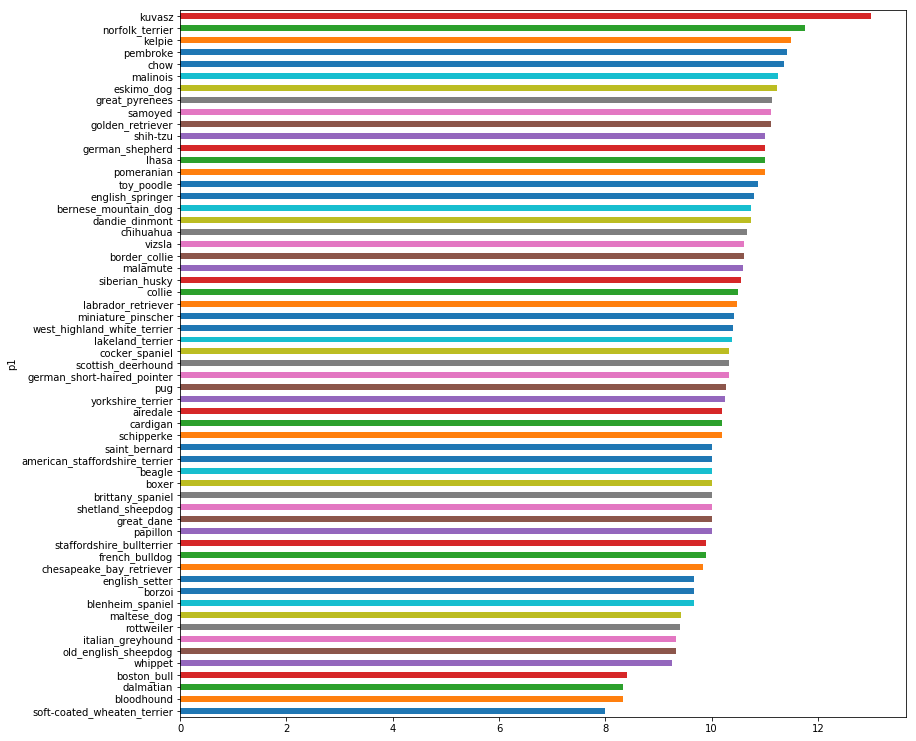

In [84]:
#select only tweets with images that contains dogs in the foreground
tweets_clean_bread = tweets_clean[tweets_clean.p1_dog == True]
#select only breads that are in at least three tweets to give a representative result
tweets_clean_bread = tweets_clean_bread.groupby(['p1']).mean()[tweets_clean_bread.groupby(['p1']).count().tweet_id >= 3]
tweets_clean_bread.sort_values(by=['rating_numerator'])['rating_numerator'].plot(kind = "barh", figsize =(13,13));

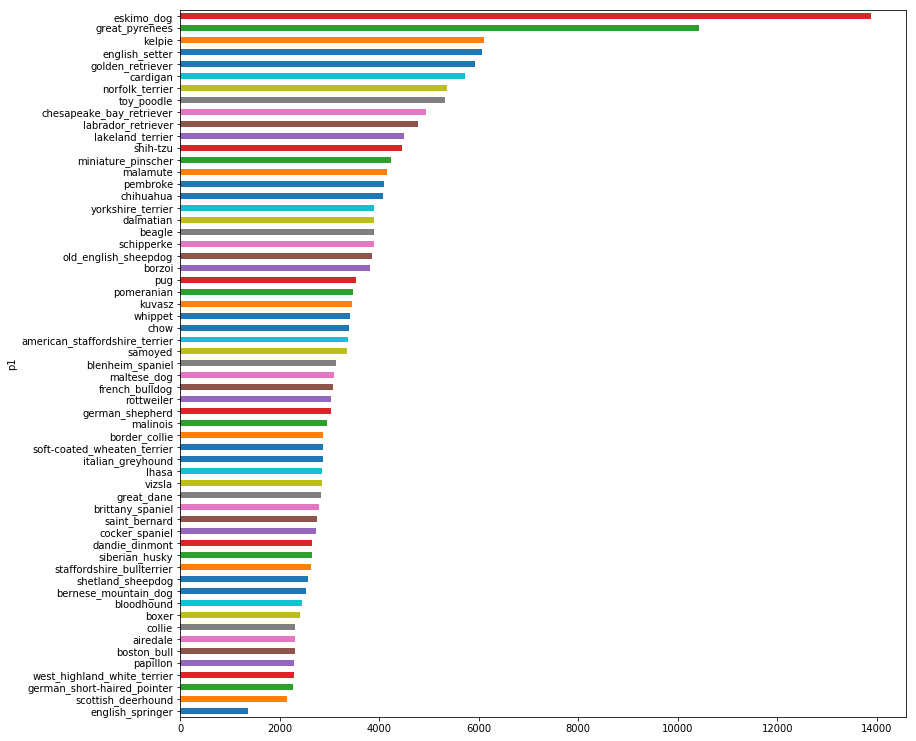

In [85]:
tweets_clean_bread.sort_values(by=['like_counts'])['like_counts'].plot(kind = "barh", figsize =(13,13));

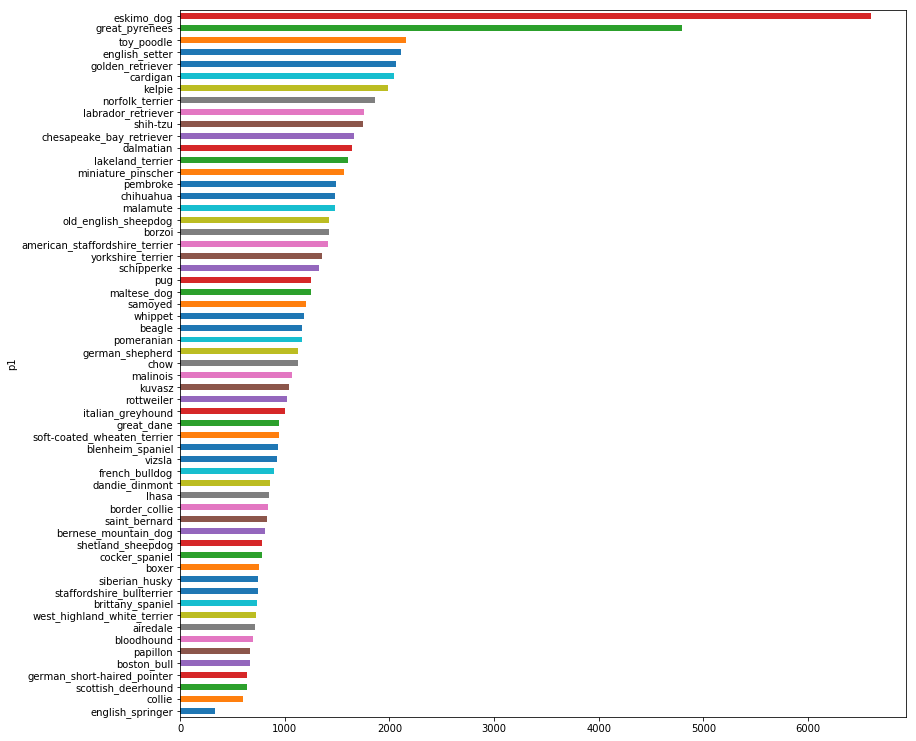

In [86]:
tweets_clean_bread.sort_values(by=['retweet_counts'])['retweet_counts'].plot(kind = "barh", figsize =(13,13));

In [87]:
#The higher the score the higher the position in rating_numerator, like_counts and retweet_counts
popularity = pd.DataFrame(columns=('bread','scoring'))
popularity.bread = tweets_clean_bread.index
popularity.scoring = np.zeros(len(popularity.bread))
#iterate over all breads
for bread in tweets_clean_bread.index:
    #iterate over all positions
    for i in range(len(tweets_clean_bread.index)):
        #add position where the bread in the scoring of rating
        if tweets_clean_bread.sort_values(by=['rating_numerator']).index[i] == bread:
            popularity.loc[popularity.bread == bread, 'scoring'] += i
        #save position where the bread in the scoring of likes
        if tweets_clean_bread.sort_values(by=['like_counts']).index[i] == bread:
            popularity.loc[popularity.bread == bread, 'scoring'] += i
        #save position where the bread in the scoring of retweets
        if tweets_clean_bread.sort_values(by=['retweet_counts']).index[i] == bread:
            popularity.loc[popularity.bread == bread, 'scoring'] += i

In [88]:
popularity.sort_values(by=['scoring'], ascending = False)

,bread,scoring
21,eskimo_dog,168.0
27,great_pyrenees,165.0
29,kelpie,164.0
38,norfolk_terrier,160.0
25,golden_retriever,157.0
54,toy_poodle,151.0
50,shih-tzu,144.0
41,pembroke,143.0
31,labrador_retriever,133.0
11,cardigan,130.0


Insight: Taking the scoring with rating_numerator, like_counts and retweet_counts the eskimodog equaliy in account, the eskimo dog is the most popular dog.